In [46]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

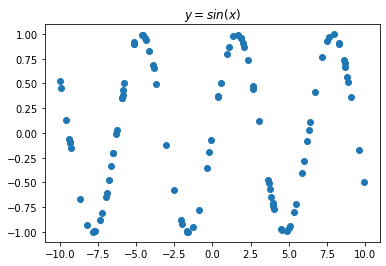

In [47]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

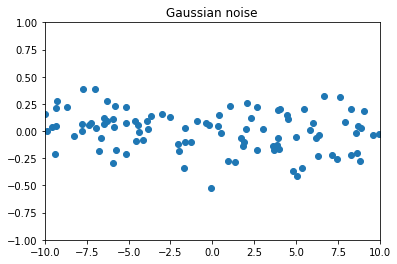

In [48]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

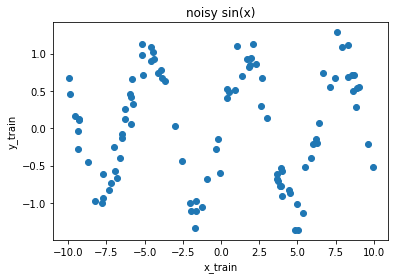

In [49]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [50]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

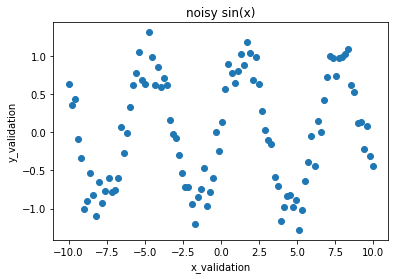

In [51]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

noise = torch.randn(y_validation.shape) / 5.

y_validation = y_validation + noise
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [52]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [53]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(20)

In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sine_net = sine_net.to(device)

x_train = x_train.to(device)
y_train = y_train.to(device)

x_validation = x_validation.to(device)
y_validation = y_validation.to(device)

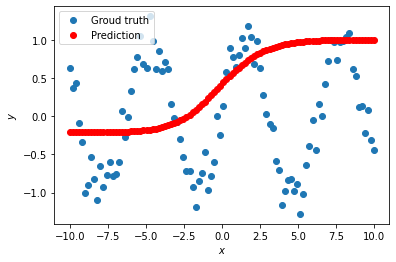

In [55]:
def predict_graph(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.data.cpu().numpy(), y.data.cpu().numpy(), 'o', label='Groud truth')
    plt.plot(x.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict_graph(sine_net, x_validation, y_validation)

In [56]:
def predict(net, x, y):
    return net.forward(x)

In [57]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [58]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

среднеквадратичная ошибка - 0.04198664426803589


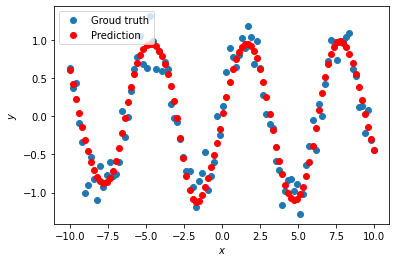

In [59]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict_graph(sine_net, x_validation, y_validation)
print(f'среднеквадратичная ошибка - {loss(predict(sine_net, x_validation, y_validation), y_validation)}')